In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost fastapi uvicorn pydantic joblib python-multipart


Active code page: 1252
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [3]:
df = pd.read_csv(r"C:\Users\satya\Downloads\Casestudy 1\Task\artifacts\processed_data.csv")
df.head()


,Location,Size,Bedrooms,Bathrooms,Year Built,Condition,Type,Price,Sold_Year,Sold_Month,Property_Age
0,0,3974.0,2.0,2.0,2007.0,1,1,324000.0,2020,11,13.0
1,0,1660.0,2.0,3.0,1934.0,1,1,795000.0,2022,10,88.0
2,2,2094.0,2.0,2.0,1950.0,1,1,385000.0,2020,11,70.0
3,1,1930.0,2.0,3.0,1905.0,1,1,651000.0,2021,12,116.0
4,1,1895.0,5.0,2.0,1936.0,2,1,1878000.0,2024,10,88.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247172 entries, 0 to 247171
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Location      247172 non-null  int64  
 1   Size          247172 non-null  float64
 2   Bedrooms      247172 non-null  float64
 3   Bathrooms     247172 non-null  float64
 4   Year Built    247172 non-null  float64
 5   Condition     247172 non-null  int64  
 6   Type          247172 non-null  int64  
 7   Price         247172 non-null  float64
 8   Sold_Year     247172 non-null  int64  
 9   Sold_Month    247172 non-null  int64  
 10  Property_Age  247172 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 20.7 MB


Cell 4 — Correlation with Price

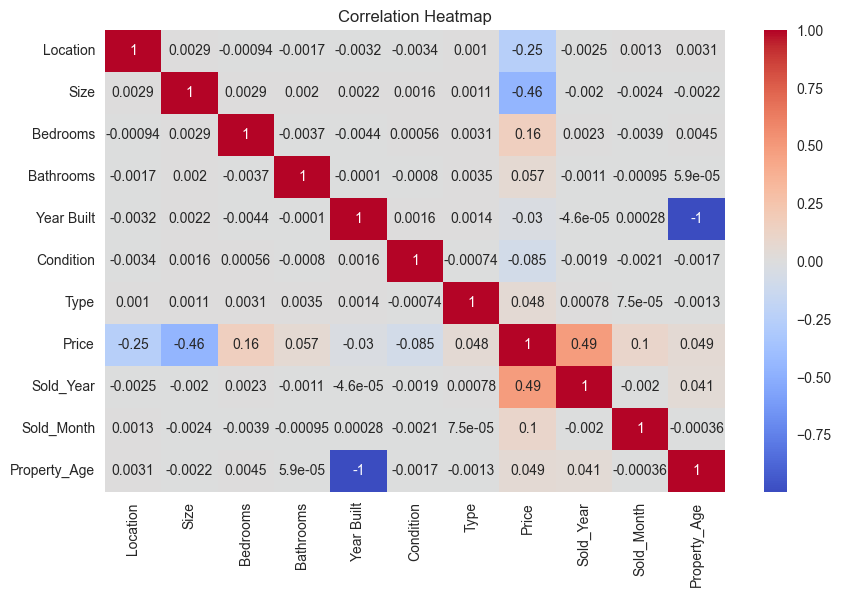

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Cell 5 — Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((197737, 10), (49435, 10))

Cell 6 — Helper Functions for Evaluation

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    r2 = r2_score(y_test, preds)
    return rmse, r2


Cell 7 — Linear Regression

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)

    # Manual RMSE for older scikit-learn versions
    rmse = mean_squared_error(y_test, preds) ** 0.5
    r2 = r2_score(y_test, preds)

    return rmse, r2


Cell 8 — Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

rf_rmse = mean_squared_error(y_test, rf_preds) ** 0.5
rf_r2 = r2_score(y_test, rf_preds)

rf_rmse, rf_r2


(89889.64691534273, 0.832764007766835)

Cell 9 — XGBoost (Best Model Expected)

In [12]:
pip install xgboost


Active code page: 1252
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\satya\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [18]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42
)

xgb.fit(X_train, y_train)

xgb_preds = xgb.predict(X_test)

xgb_rmse = mean_squared_error(y_test, xgb_preds) ** 0.5
xgb_r2 = r2_score(y_test, xgb_preds)

xgb_rmse, xgb_r2


(87992.70259759782, 0.8397479050327277)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)

# Manual RMSE (your sklearn is old)
lr_rmse = mean_squared_error(y_test, lr_preds) ** 0.5
lr_r2 = r2_score(y_test, lr_preds)

lr_rmse, lr_r2


(153449.71619124067, 0.5126481923594)

CELL 10 — FINAL MODEL COMPARISON TABLE

In [19]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "RMSE": [lr_rmse, rf_rmse, xgb_rmse],
    "R2 Score": [lr_r2, rf_r2, xgb_r2]
})

results


,Model,RMSE,R2 Score
0,Linear Regression,153449.716191,0.512648
1,Random Forest,89889.646915,0.832764
2,XGBoost,87992.702598,0.839748


CELL 11 — RMSE & R2 Comparison Plots

Plot 1 — RMSE Comparison

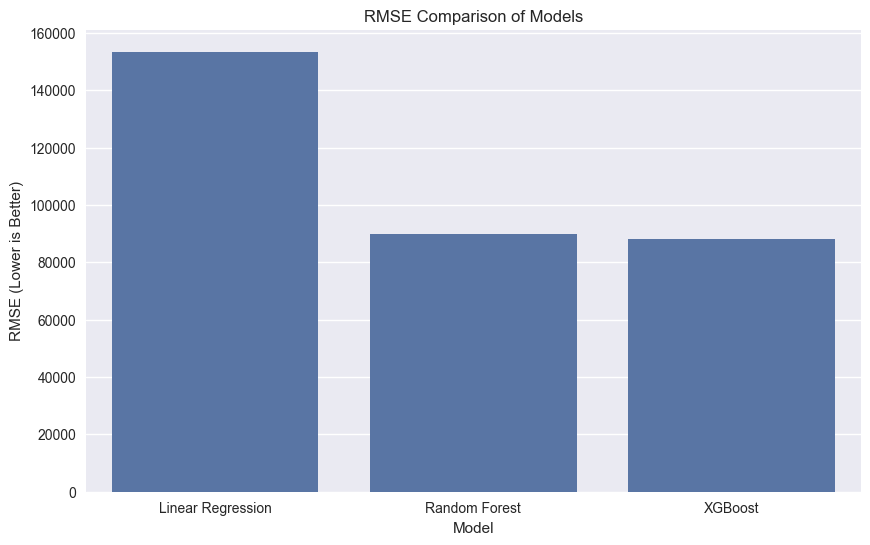

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(data=results, x="Model", y="RMSE")
plt.title("RMSE Comparison of Models")
plt.ylabel("RMSE (Lower is Better)")
plt.xlabel("Model")
plt.show()


Plot 2 — R² Comparison

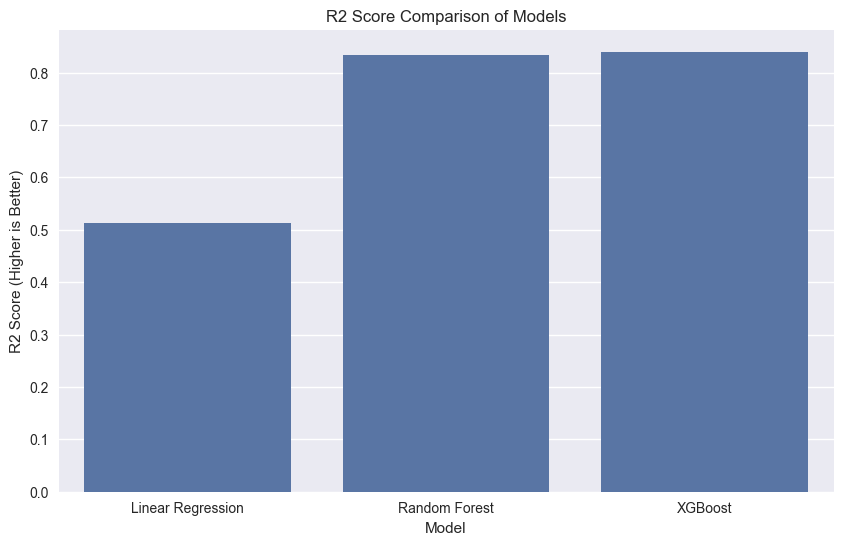

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(data=results, x="Model", y="R2 Score")
plt.title("R2 Score Comparison of Models")
plt.ylabel("R2 Score (Higher is Better)")
plt.xlabel("Model")
plt.show()
